Importing Libraries

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso,LassoCV
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [4]:
data=pd.read_csv("HousingData.csv") # loading datat

Data Exploration

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.isnull().sum()

In [ ]:
null_columns = data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

Handling Missing Values

In [5]:
medians = data.median()

In [6]:
data_cleaned = data.fillna(data.median()) #assiging median of each col to na values

In [ ]:
data_cleaned.head(9)

In [ ]:
data_cleaned.isnull().sum()

Seperating  features X ( Predictors ) and Target variable Y

In [25]:
X = data_cleaned.drop('MEDV', axis = 1) # axis = 1 shows opertion perform on columns
Y = data_cleaned['MEDV']

Spliting data into Training and Testing Sets

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

Bigger the Magnititude of Ceoficient, bigger is the influence of that feature in prediction. Intercept is the value of response variable when all other features are zero.

In [49]:
print("Model Coefficients: ", model.coef_)
print("Model Intercept: ", model.intercept_)

Model Coefficients:  [-1.12573993e-01  2.81793653e-02 -2.56559077e-02  3.27948215e+00
 -1.59783383e+01  4.71714026e+00 -1.81899639e-02 -1.50621917e+00
  2.18216881e-01 -9.05444537e-03 -8.90009543e-01  1.20329382e-02
 -4.44166764e-01]
Model Intercept:  28.16795337495841


Visualize the importance of each feature. We can see NOX ( the higher the value of Nitrogen in envrionemnt, has biggest negative impact in pricing of house ) also RM and CHAS played role in the price

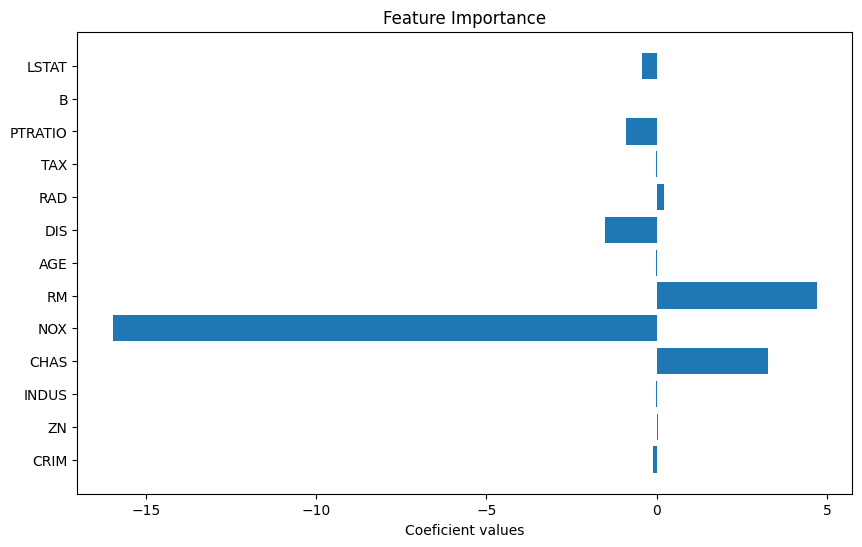

In [54]:
features = X.columns
importances = model.coef_
plt.figure(figsize=(10,6))
plt.barh(features,importances)
plt.xlabel("Coeficient values")
plt.title("Feature Importance")
plt.show()

R2 indicates 65% of variance are explained by the features. While MSE indicate 24.9%, indicating the percntage of error. The Higher R2 value and lower MSE value, indicates better model fit. Our model performs moderately well.

In [72]:
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print("Mean Squared Error: ",mse)
print("R2 : ",r2)

Mean Squared Error:  24.999384790103406
R2 :  0.6591013893903506


Visualizing Actual vs Predicted value by model. If blue dots are closely align to red line, indicates better model fit. we see some of data points are far away but most of them are align on or closer to the line

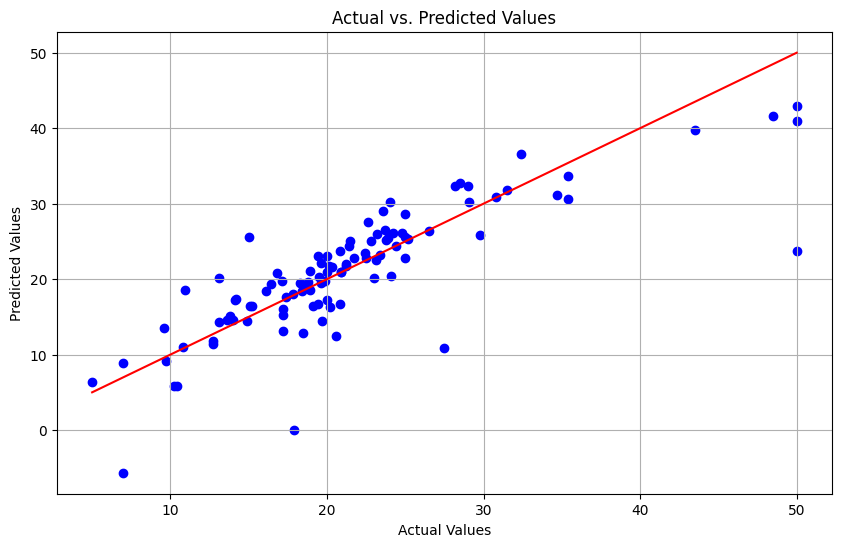

In [82]:
plt.figure(figsize=(10,6))
plt.scatter(Y_test,Y_pred,color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

Each blue point represents a prediction from the model, with the x-axis showing the predicted value and the y-axis showing the corresponding residual (error).
Residual= Yactual− Ypredicted
​

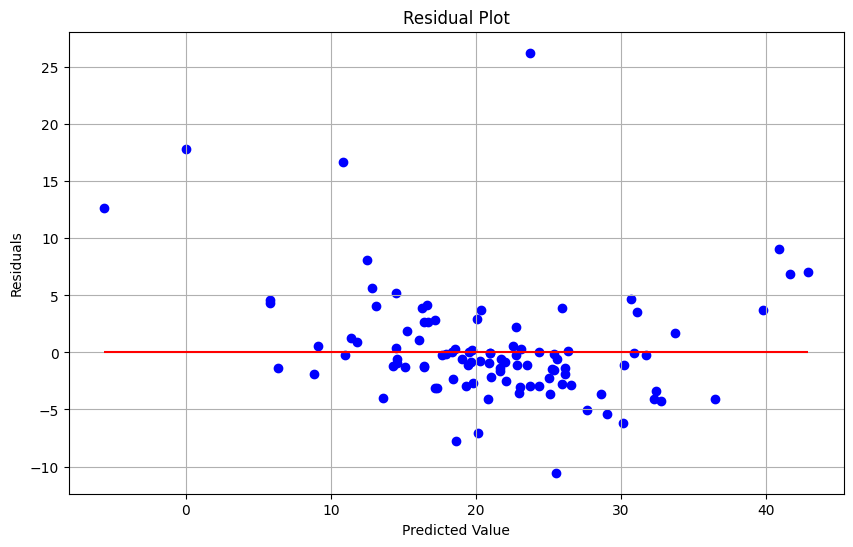

In [85]:
plt.figure(figsize=(10,6))
residuals = Y_test -  Y_pred
plt.scatter(Y_pred,residuals,color = "blue")
plt.hlines(y=0, xmin=Y_pred.min(), xmax=Y_pred.max(), colors='red')
plt.xlabel("Predicted Value")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

Lets fit another model and consider onl the most important features to see if model improves

In [86]:
X2 = data_cleaned[['RM','NOX','CHAS','LSTAT','DIS','PTRATIO','RAD']]
Y2 = data_cleaned['MEDV']

In [87]:
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y2,test_size=0.2, random_state=42)

In [88]:
model2 = LinearRegression()
model2.fit(X2_train,Y2_train)

LinearRegression()

In [89]:
print("Coeficients: ",model2.coef_)
print("Intercept: ",model2.intercept_)

Coeficients:  [ 4.70386543e+00 -2.05620584e+01  3.92290983e+00 -5.19518227e-01
 -1.15566279e+00 -9.74538920e-01 -8.47490910e-03]
Intercept:  33.05335876919537


New Model with lesser feature did not improve our model as we got approximately same values for MSE and R2 as we had in previous model

In [90]:
Y2_pred = model2.predict(X2_test)
mse2 = mean_squared_error(Y2_test,Y2_pred)
r22 = r2_score(Y2_test,Y2_pred)
print("MSE : ", mse2)
print("R2:,",r22)

MSE :  25.27856882066974
R2:, 0.655294357780431


We can try Lasso Regression with a penalty value of alpha ( Tuning regularization parameter). we keep trying different values for alpha till we get a value that does not improve model futher

In [65]:
lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train,Y_train)

Lasso(alpha=0.001)

In [67]:
Y_lasso_pred = lasso_model.predict(X_test)

In [68]:
mse_lasso = mean_squared_error(Y_test,Y_lasso_pred)
r2_lasso = r2_score(Y_test,Y_lasso_pred)
print("Mean Squared Error: ", mse_lasso)
print("R2: ",r2_lasso)

Mean Squared Error:  24.998863232828917
R2:  0.659108501491377


Rather then manually trying different Alpha values, we can use cross validation to chose the optimal value for Alpha

In [57]:
alphas = np.logspace(-3,1,50)

In [60]:
lasso_cv_model = LassoCV(alphas=alphas, cv=5)
lasso_cv_model.fit(X_train,Y_train)

LassoCV(alphas=array([1.00000000e-03, 1.20679264e-03, 1.45634848e-03, 1.75751062e-03,
       2.12095089e-03, 2.55954792e-03, 3.08884360e-03, 3.72759372e-03,
       4.49843267e-03, 5.42867544e-03, 6.55128557e-03, 7.90604321e-03,
       9.54095476e-03, 1.15139540e-02, 1.38949549e-02, 1.67683294e-02,
       2.02358965e-02, 2.44205309e-02, 2.94705170e-02, 3.55648031e-02,
       4.29193426e-02, 5.17947468e-0...
       9.10298178e-02, 1.09854114e-01, 1.32571137e-01, 1.59985872e-01,
       1.93069773e-01, 2.32995181e-01, 2.81176870e-01, 3.39322177e-01,
       4.09491506e-01, 4.94171336e-01, 5.96362332e-01, 7.19685673e-01,
       8.68511374e-01, 1.04811313e+00, 1.26485522e+00, 1.52641797e+00,
       1.84206997e+00, 2.22299648e+00, 2.68269580e+00, 3.23745754e+00,
       3.90693994e+00, 4.71486636e+00, 5.68986603e+00, 6.86648845e+00,
       8.28642773e+00, 1.00000000e+01]),
        cv=5)

In [62]:
best_alpha_cv = lasso_cv_model.alpha_
print("Best Value for alpha: ", best_alpha_cv)

Best Value for alpha:  0.001


We can see even, Lasso model did not improve the result. But overall the reuslt and performance is average. One way to improve, would be trying a bigger data set or using non linear models like Decision Tree or Random Forest

In [64]:
Y_pred_lasso_cv = lasso_cv_model.predict(X_test)
mse_lasso_cv = mean_squared_error(Y_test,Y_pred_lasso_cv)
r2_lasso_cv =  r2_score(Y_test,Y_pred_lasso_cv)
print("Means square error: ", mse_lasso_cv)
print("R squared: ",r2_lasso_cv)

Means square error:  24.998863232828917
R squared:  0.659108501491377
